#  Pair Programming Visualización I

Es el momento de ponernos manos a la obra con la visualización de datos.

En este primer ejercicio de pair programming trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III,ese en el que habíamos eliminado algunas columnas de nuestro csv.

Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.

📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodosque hemos aprendido en lecciones anteriores de Pandascomo por ejemplo value_counts(), isnull, describe, etc.

Tendréis que realizar gráficas para contestar a las siguientes preguntas:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from os import getcwd

In [3]:

df_tiburones = pd.read_csv("../Pandas/datos/03-attacks.csv", index_col=0)
df_tiburones.head(3)

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN


In [36]:
df_tiburones.shape

(6114, 21)

In [37]:
df_tiburones.columns

Index(['Case Number', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# 1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [13]:
ataques_sexo = df_tiburones["Sex "].value_counts()
ataques_sexo

M      4939
F       619
M         2
N         2
lli       1
.         1
Name: Sex , dtype: int64

In [14]:
# ejes 
x = ataques_sexo.index
y = ataques_sexo.values

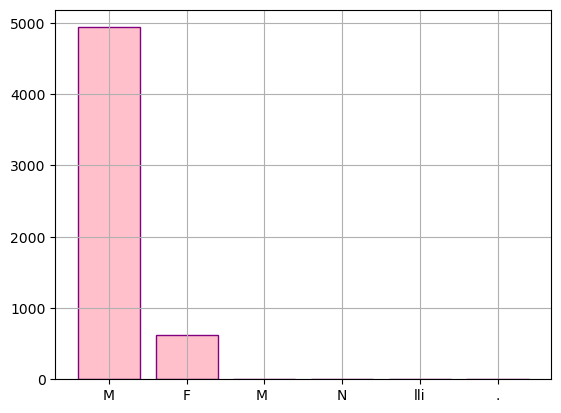

In [15]:
plt.figure()
plt.bar(x,y,facecolor = "pink", ec = "purple")
plt.grid()
plt.show()

# 2. ¿Cuál es el porcentaje de nulos por columna? 

Usa un pie chart
donde incluyáis el porcentaje de cada variable en el 
interior del quesito. 
Para eso tendréis que usar el parámetro autopct,  algo de documentación

In [16]:
#ejes
y_columnas = df_tiburones.isna().sum().index
y_columnas

Index(['Case Number', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [17]:
x_valores = df_tiburones.isna().sum().values
x_valores

array([   1,    0,    4,   40,  408,  488,  511,  200,  550, 2666, 3180,
       2705,   16,    0,    1,    0,    0,    0,    0, 6113, 6112])

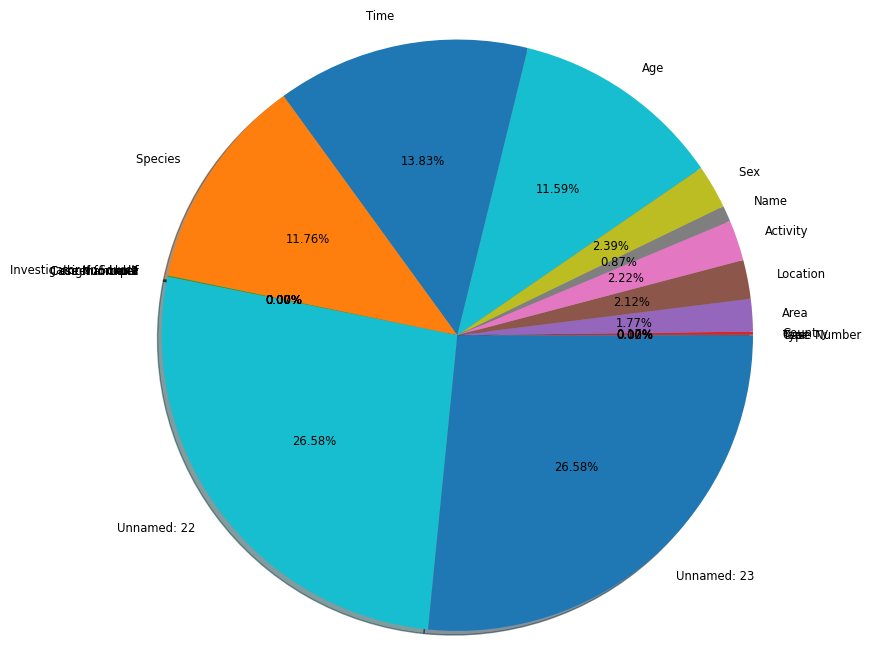

In [40]:
plt.figure()
plt.pie(x_valores, labels = y_columnas,autopct = '%1.2f%%',textprops={'size': 'smaller'},
                                          shadow=True, radius=2)
plt.show()

# 3.¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [67]:
df_describe = df_tiburones.describe(include='object')
df_describe

,Case Number,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,Unnamed: 22,Unnamed: 23
count,6113,6110,6074,5706,5626,5603,5914,5564,3448,2934,3409,6098,6114,6113,6114,6114,6114,1,2
unique,6113,8,201,791,4020,1484,5118,6,156,366,1529,4837,6105,6104,6099,6113,6114,1,2
top,2018.06.25,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,17,Afternoon,White shark,"C. Moore, GSAF",1898.00.00.R-Syria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.08.04,2018.06.25,stopped here,Teramo
freq,1,4438,2200,1025,162,966,511,4939,154,183,161,95,2,2,4,2,1,1,1


In [68]:
#mostramos solo la categoria unicos, con loc que selecciona elementos en base a las etiquetas de nuestras filas o columnas.
df_describe.loc['unique']

Case Number               6113
Type                         8
Country                    201
Area                       791
Location                  4020
Activity                  1484
Name                      5118
Sex                          6
Age                        156
Time                       366
Species                   1529
Investigator or Source    4837
pdf                       6105
href formula              6104
href                      6099
Case Number.1             6113
Case Number.2             6114
Unnamed: 22                  1
Unnamed: 23                  2
Name: unique, dtype: object

# 4. Filtrad los datos para quedarnos solo con los datos de USA.

¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo?

Muestra solo los que hayan ocurrido del 2000 en adelante.
En función del tipo,

 ¿cuántos ataques de tiburones de cada tipo hubo en USA? 

 Muestra los resultados en un gráfico de línea.


In [72]:
# solo los del 2000, pero del tiburones no del describe porque en ese nos quita el año
df_tiburones[(df_tiburones["Country"] == "USA") & (df_tiburones["Year"] >2000)].shape[0]

959

In [74]:
# ponemos type porque el value count tiene que hacerse sobre una columna siempre y nos lo dice el enunciado que se por tipo
ataques_usa = df_tiburones[(df_tiburones["Country"] == "USA") & (df_tiburones["Year"] >2000)]['Type'].value_counts()
ataques_usa

Unprovoked      797
Invalid          65
Provoked         60
Boating          32
Boat              3
Sea Disaster      2
Name: Type, dtype: int64

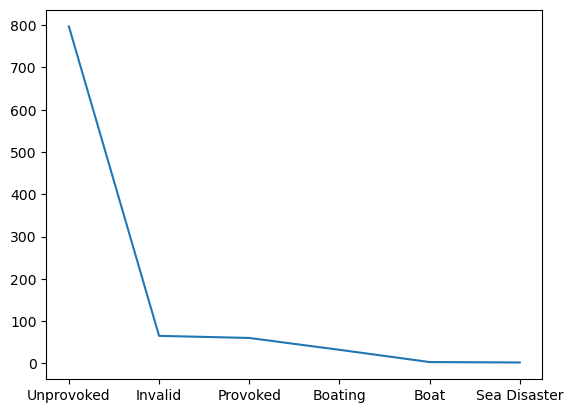

In [75]:
# hacemos la gráfica, siempre eje x y eje y 
x = ataques_usa.index
y = ataques_usa.values
plt.figure()
plt.plot(x,y)
plt.show()

# 5. Filtrad los datos para Spain:

¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? 

Muestra solo los que hayan ocurrido del 2000 en adelante.


En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España?

Muestra los resultados en un gráfico de línea.


In [76]:
df_tiburones[(df_tiburones["Country"] == "SPAIN") & (df_tiburones["Year"] >2000)].shape[0]

16

In [79]:
ataques_spain = df_tiburones[(df_tiburones["Country"] == "SPAIN") & (df_tiburones["Year"] >2000)]['Type'].value_counts()
ataques_spain

Unprovoked    9
Invalid       5
Provoked      2
Name: Type, dtype: int64

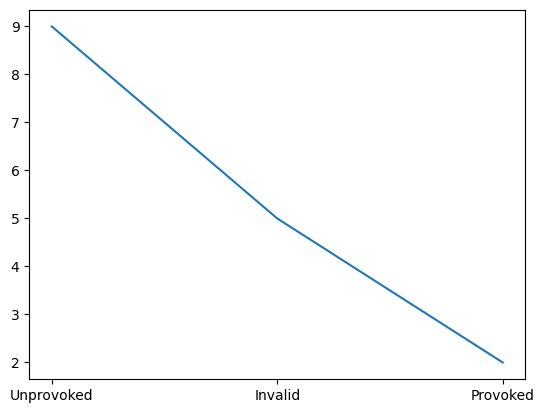

In [80]:
x = ataques_spain.index
y = ataques_spain.values
plt.figure()
plt.plot(x,y)
plt.show()

Hubo 16 ataques la mayoria no provocados.